# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth, or more obviously - it is currently summer in the southern hemisphere.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20, otherwise url may be incorrect 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Open API key
api_key = api_keys.api_key

# URL for Weather Map API call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

In [ ]:
# Create empty lists to append API data to

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls will be successful as not all cities generated will have records
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record += 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Linden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=linden
Processing Record 2 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=chokurdakh
Processing Record 3 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=kapaa
Processing Record 4 | Oxford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=oxford
Processing Record 5 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=laguna
Processing Record 6 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=bethel
Processing Record 7 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 56 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=kloulklubed
Processing Record 57 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=faya
Processing Record 58 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=new%20norfolk
Processing Record 59 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=carutapera
Processing Record 60 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=port%20blair
Processing Record 61 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=puerto%20del%20rosario
City not found. Skipping...
Processing Record 62 | Touros
http://api.openweathermap.org/data/2.5

City not found. Skipping...
Processing Record 112 | Malartic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=malartic
Processing Record 113 | Achit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=achit
Processing Record 114 | Somoto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=somoto
Processing Record 115 | Cape Canaveral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=cape%20canaveral
Processing Record 116 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=severo-kurilsk
Processing Record 117 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=tuktoyaktuk
Processing Record 118 | Arcata
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 166 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=ahipara
Processing Record 167 | Sangre Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=sangre%20grande
Processing Record 168 | Miraflores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=miraflores
Processing Record 169 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=kaeo
Processing Record 170 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=constitucion
Processing Record 171 | Pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=pochutla
Processing Record 172 | Russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e847

Processing Record 222 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=clyde%20river
Processing Record 223 | Muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=muravlenko
Processing Record 224 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=wanning
Processing Record 225 | Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=lasa
City not found. Skipping...
Processing Record 226 | Lazarev
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=lazarev
Processing Record 227 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a698e8476a4857f6c36d8f5b&q=beira
Processing Record 228 | Tupik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0007ca1a6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create dictionary to store lists
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Max Temp": max_temp,
    "Latitude": lat,
    "Longitude": lng
}

In [16]:
# Create dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          548
Country       548
Date          548
Humidity      548
Cloudiness    548
Wind Speed    548
Max Temp      548
Latitude      548
Longitude     548
dtype: int64

In [17]:
# Export dataframe to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [18]:
# Show dataframe
weather_data.head()

,City,Country,Date,Humidity,Cloudiness,Wind Speed,Max Temp,Latitude,Longitude
0,Mahebourg,MU,1548644400,88,75,6.98,78.80,-20.41,57.70
1,Jamestown,AU,1548646669,86,0,4.97,73.75,-33.21,138.60
2,Ushuaia,AR,1548644400,53,75,12.75,50.00,-54.81,-68.31
3,Ponta do Sol,BR,1548646672,91,8,2.84,62.19,-20.63,-46.00
4,Rikitea,PF,1548646673,99,0,11.56,80.91,-23.12,-134.97


#### Latitude vs. Temperature Plot

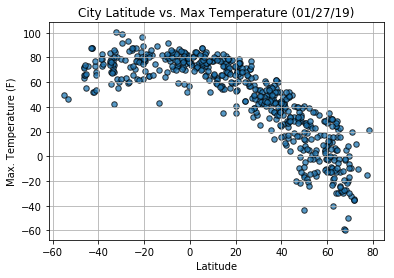

In [27]:
# Build scatterplot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o", s=30, edgecolor="black", alpha=0.75)

# Set title, labels, grid
plt.title("City Latitude vs. Max Temperature (01/27/19)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

# Export plot
plt.savefig("Output_Plots/MaxTemp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

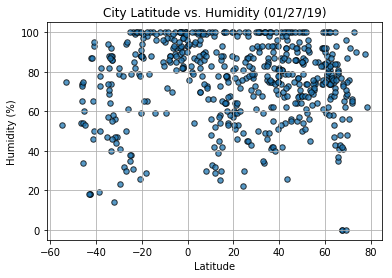

In [28]:
# Build scatterplot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", s=30, edgecolor="black", alpha=0.75)

# Set title, labels, grid
plt.title("City Latitude vs. Humidity (01/27/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Export plot
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

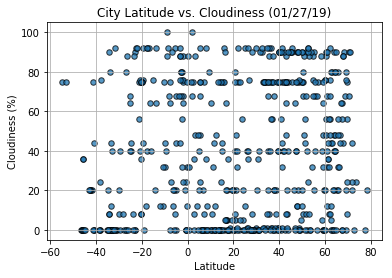

In [29]:
# Build scatterplot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", s=30, edgecolor="black", alpha=0.75)

#Set title, labels, grid
plt.title("City Latitude vs. Cloudiness (01/27/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Export plot
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

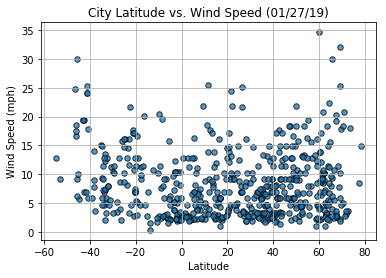

In [30]:
# Build scatterplot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", s=30, edgecolor="black", alpha=0.75)

# Set title, labels, grid
plt.title("City Latitude vs. Wind Speed (01/27/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Export
plt.savefig("Output_Plots/WindSpeed_vs_Latitude.png")

# Show plot
plt.show()